# Practical Applicaiton #3
## Overview
In this third practical application assignment, your goal is to compare the performance of the classifiers (k-nearest neighbors, logistic regression, decision trees, and support vector machines) you encountered in this section of the program. You will use a dataset related to the marketing of bank products over the telephone.

## Data
The dataset you will use comes from the [UCI Machine Learning repository](https://archive.ics.uci.edu/ml/datasets/bank+marketing). The data is from a Portuguese banking institution and is a collection of the results of multiple marketing campaigns. The classification goal is to predict if the client will subscribe a term deposit.

## Deliverables
After understanding, preparing, and modeling your data, build a Jupyter Notebook that includes a clear statement demonstrating your understanding of the business problem, a correct and concise interpretation of descriptive and inferential statistics, your findings (including actionable insights), and next steps and recommendations.

# Data and Business understanding
## Dataset information
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

There are four datasets: 
1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs). 
4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs). 
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM). 

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

In [85]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 
  
# metadata 
print(bank_marketing.metadata) 
  
# variable information 
print(bank_marketing.variables) 


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'title': 'A data-driven approach to predict the success of bank telemarketing'

## Data preparation
1. Deal with missing values
2. Convert data to a proper type if needed
3. Overview of data distributions and outliers
4. Remove duplicated rows 

In [86]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


In [87]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN


### Missing values

In [88]:
# filter columns with missign values
missing = X.isnull().mean()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing

job          0.006370
education    0.041074
contact      0.287983
poutcome     0.817478
dtype: float64

In [89]:
# drop poutcome column since it has 81% missing values
X.drop(columns=['poutcome'], inplace=True)

/var/folders/rz/d543tms9543f_v11vps9f2s00000gp/T/ipykernel_2880/3482441593.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['poutcome'], inplace=True)


In [90]:
X.contact.value_counts()

contact
cellular     29285
telephone     2906
Name: count, dtype: int64

In [91]:
# drop contact column since it has only 2 unique values and one of them is very rare. So it is not useful for the model and we can drop it.
X.drop(columns=['contact'], inplace=True)

/var/folders/rz/d543tms9543f_v11vps9f2s00000gp/T/ipykernel_2880/341117038.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['contact'], inplace=True)


In [92]:
X.job.value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: count, dtype: int64

In [93]:
# fill missing values in job column with the most frequent value
X.job.fillna('blue-collar', inplace=True)

/var/folders/rz/d543tms9543f_v11vps9f2s00000gp/T/ipykernel_2880/2340000553.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.job.fillna('blue-collar', inplace=True)


In [94]:
X.education.value_counts()

education
secondary    23202
tertiary     13301
primary       6851
Name: count, dtype: int64

In [95]:
# fill missing values in education column with the most frequent value
X.education.fillna('secondary', inplace=True)

/var/folders/rz/d543tms9543f_v11vps9f2s00000gp/T/ipykernel_2880/1449899992.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.education.fillna('secondary', inplace=True)


In [96]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          45211 non-null  object
 2   marital      45211 non-null  object
 3   education    45211 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   day_of_week  45211 non-null  int64 
 9   month        45211 non-null  object
 10  duration     45211 non-null  int64 
 11  campaign     45211 non-null  int64 
 12  pdays        45211 non-null  int64 
 13  previous     45211 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 4.8+ MB


### Data types
All object columns have categorical or boolean data values. However, we will use column transformers to convert them into numerical values as a part of our Pipeline.

### Data destributions and outliers

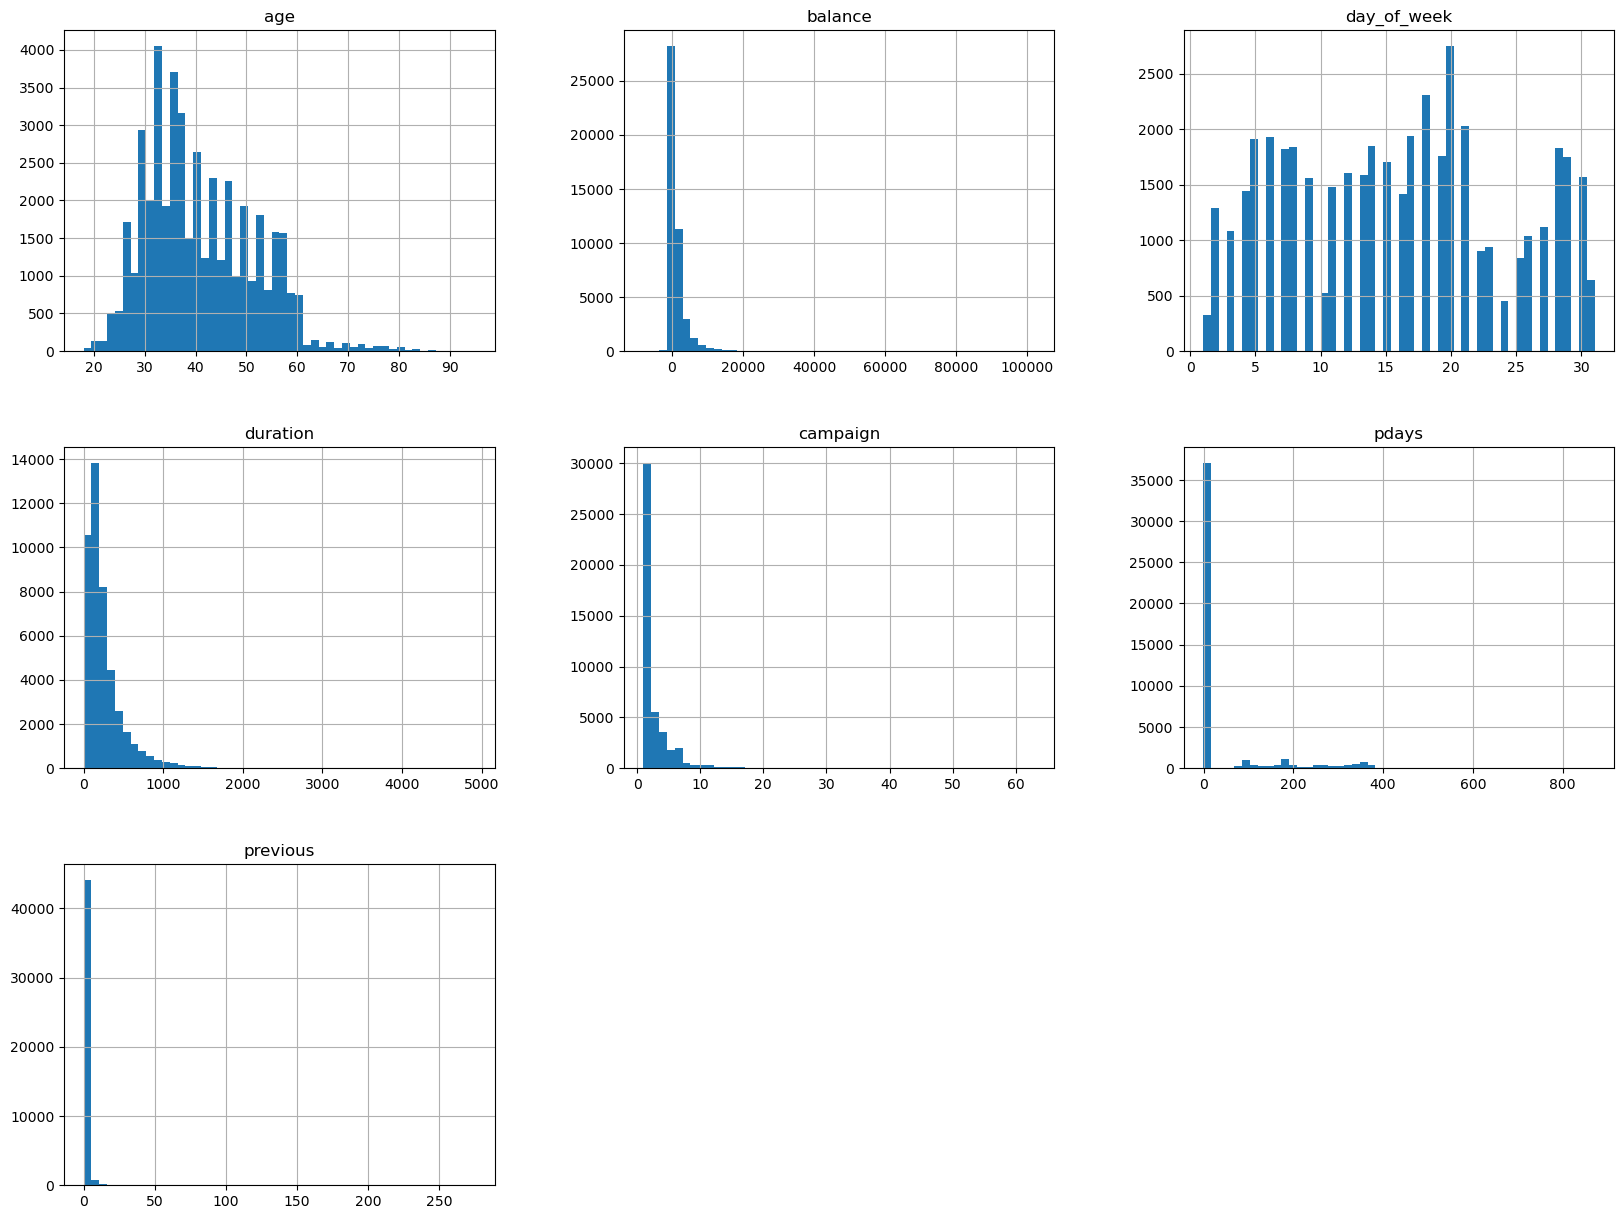

In [97]:
# plot data distribution diagram for numerical data
import matplotlib.pyplot as plt

X.hist(bins=50, figsize=(20,15))
plt.show()

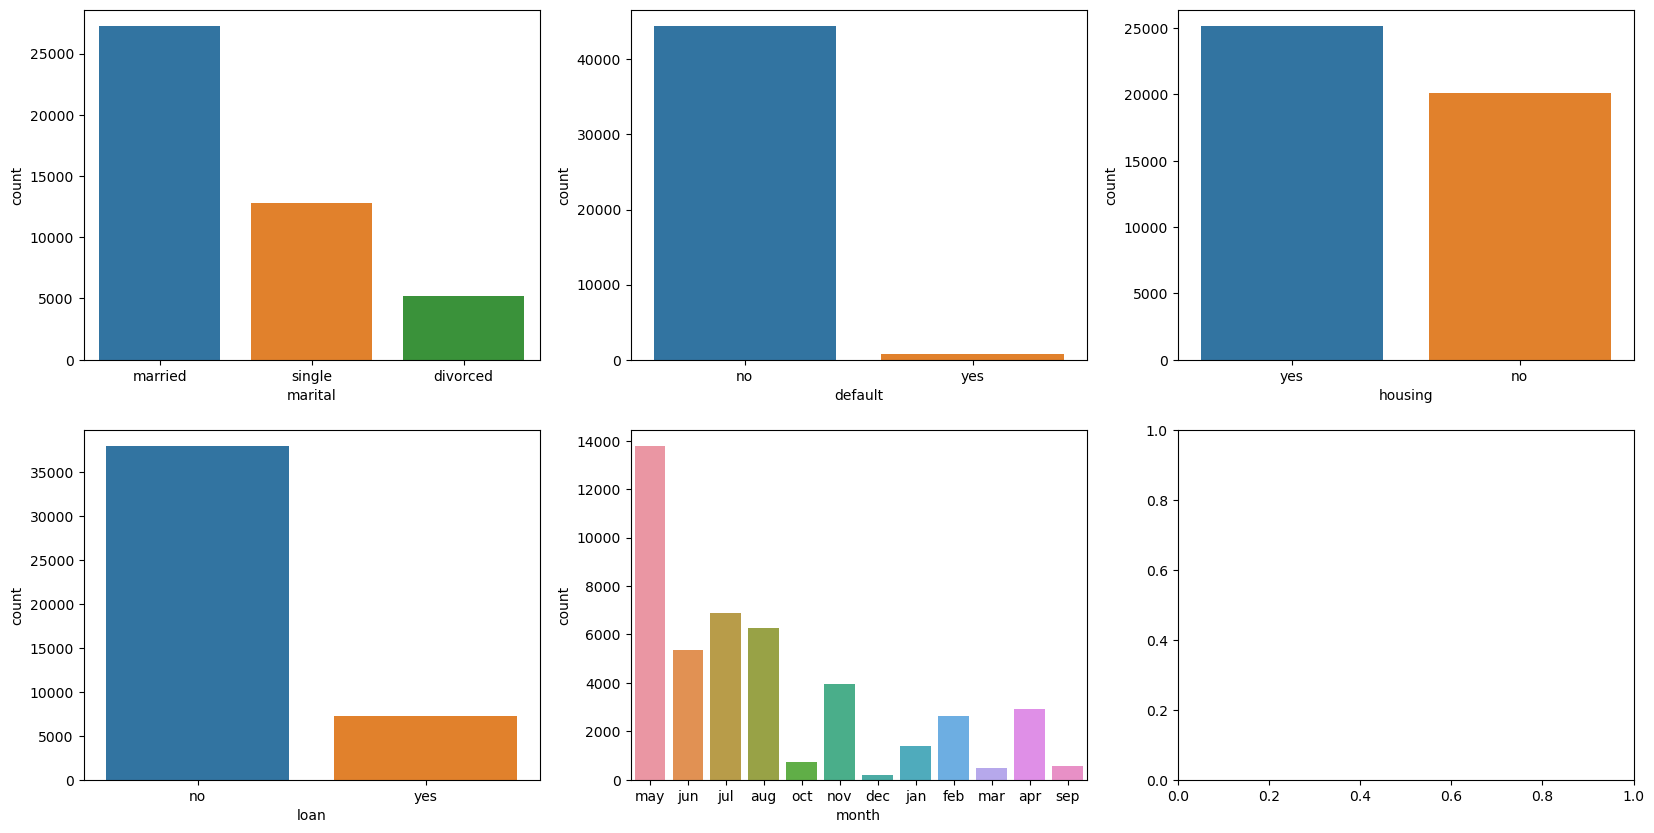

In [98]:
# plot data distribution diagram for categorical data
import seaborn as sns

fig, ax = plt.subplots(2, 3, figsize=(20, 10))
sns.countplot(x='marital', data=X, ax=ax[0, 0])
sns.countplot(x='default', data=X, ax=ax[0, 1])
sns.countplot(x='housing', data=X, ax=ax[0, 2])
sns.countplot(x='loan', data=X, ax=ax[1, 0])
sns.countplot(x='month', data=X, ax=ax[1, 1])
plt.show()

<Axes: xlabel='y'>

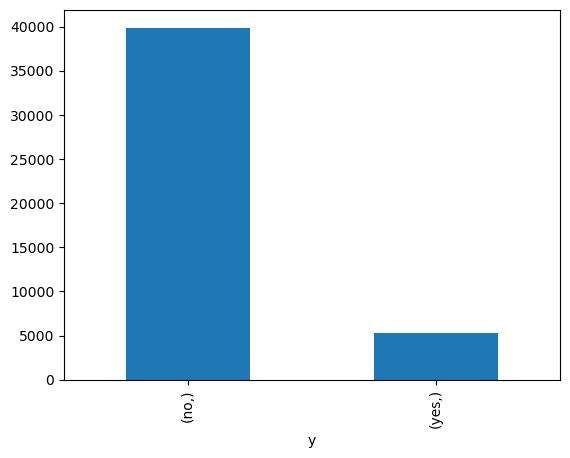

In [99]:
# plot Y distribution
y.value_counts().plot(kind='bar')

We can see that some features and target are distributed unevenly however there are no outliers that we should worry about.

In [100]:
# remove duplicate rows
X.drop_duplicates(inplace=True)
X.shape

/var/folders/rz/d543tms9543f_v11vps9f2s00000gp/T/ipykernel_2880/2711946923.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop_duplicates(inplace=True)


(45211, 14)

# Modeling
Investigate the performance of 4 models
   * KNN
   * Decision Trees
   * Logistic Regression
   * SVM

### Evaluation metrics
We will keep track of the following metrics:
* accuracy
* precision
* recall_score
* f1_score
* training time

### Model validation approach
We will utilize the entire dataset for training using K-fold cross-validation. Subsequently, the optimal model will undergo evaluation on the complete dataset, with outcome metrics employed for model comparison.


In [101]:
### Create a column transformer for categorical data
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import OneHotEncoder

# get categorical and numerical columns
cat_cols = X.select_dtypes(include=['object']).columns
# create a column transformer
column_transformer = make_column_transformer((OneHotEncoder(), cat_cols), remainder='passthrough')

In [113]:
# split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### KNN    

In [102]:
# create pipeline with column transformer and standard scaler and KNN model
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

knn_pipe = Pipeline([
    ('preprocessor', column_transformer),
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

In [130]:
# user a grid search to find the best parameters for the model
from sklearn.model_selection import GridSearchCV

param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
    'knn__weights': ['uniform', 'distance']
}

knn_grid_search = GridSearchCV(knn_pipe, param_grid, n_jobs=-1, scoring = "accuracy").fit(X_train, y_train)

/Users/Tsimafei_Dynikau/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/Tsimafei_Dynikau/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/Tsimafei_Dynikau/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/Tsimafei_Dynikau/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y

In [128]:
# save model performance metrics in a dictionary
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, confusion_matrix, recall_score

y_pred = knn_grid_search.predict(X_test)
knn_metrics = {
    'accuracy': accuracy_score(y_test, y_pred),
    'precision_score': precision_score(y_test, y_pred, pos_label='yes'),
    'recall_score': recall_score(y_test, y_pred, pos_label='yes'),
    'f1_score': f1_score(y_test, y_pred, pos_label='yes'),
    'confusion_matrix': confusion_matrix(y_test, y_pred),
    'best_params': knn_grid_search.best_params_,
    'best_score': knn_grid_search.best_score_,
    'training_time': knn_grid_search.refit_time_
}

In [120]:
# print classification report
print('KNN Classification Report:')
classification_report(y_test, y_pred, output_dict=True)

KNN Classification Report:


{'no': {'precision': 0.9006591881577426,
  'recall': 0.9793762575452716,
  'f1-score': 0.9383697813121272,
  'support': 7952.0},
 'yes': {'precision': 0.5858585858585859,
  'recall': 0.21264894592117323,
  'f1-score': 0.31203765971755215,
  'support': 1091.0},
 'accuracy': 0.886873825058056,
 'macro avg': {'precision': 0.7432588870081642,
  'recall': 0.5960126017332223,
  'f1-score': 0.6252037205148397,
  'support': 9043.0},
 'weighted avg': {'precision': 0.8626798165876465,
  'recall': 0.886873825058056,
  'f1-score': 0.8628054393172493,
  'support': 9043.0}}

## Decision Trees

In [121]:
# create pipeline with column transformer and standard scaler and Decision Tree model
from sklearn.tree import DecisionTreeClassifier

dt_pipe = Pipeline([
    ('preprocessor', column_transformer),
    ('scaler', StandardScaler()),
    ('dt', DecisionTreeClassifier())
])

In [123]:
# user a grid search to find the best parameters for the model
param_grid = {
    'dt__max_depth': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
    'dt__criterion': ['gini', 'entropy']
}

dt_grid_search = GridSearchCV(dt_pipe, param_grid, n_jobs=-1, scoring = "accuracy").fit(X_train, y_train)

In [129]:
# save model performance metrics in a dictionary
y_pred = dt_grid_search.predict(X_test)
dt_metrics = {
    'accuracy': accuracy_score(y_test, y_pred),
    'precision_score': precision_score(y_test, y_pred, pos_label='yes'),
    'recall_score': recall_score(y_test, y_pred, pos_label='yes'),
    'f1_score': f1_score(y_test, y_pred, pos_label='yes'),
    'confusion_matrix': confusion_matrix(y_test, y_pred),
    'best_params': dt_grid_search.best_params_,
    'best_score': dt_grid_search.best_score_,
    'training_time': dt_grid_search.refit_time_
}


In [127]:
# print classification report
print('Decision Tree Classification Report:')
classification_report(y_test, y_pred, output_dict=True)

Decision Tree Classification Report:


{'no': {'precision': 0.9219918013021461,
  'recall': 0.9616448692152918,
  'f1-score': 0.9414009602363659,
  'support': 7952.0},
 'yes': {'precision': 0.5927903871829105,
  'recall': 0.4069660861594867,
  'f1-score': 0.4826086956521739,
  'support': 1091.0},
 'accuracy': 0.8947252018135574,
 'macro avg': {'precision': 0.7573910942425284,
  'recall': 0.6843054776873893,
  'f1-score': 0.7120048279442699,
  'support': 9043.0},
 'weighted avg': {'precision': 0.8822750322206371,
  'recall': 0.8947252018135574,
  'f1-score': 0.8860495988893181,
  'support': 9043.0}}

## Logistic Regression 

In [131]:
# create pipeline with column transformer and standard scaler and Logistic Regression model
from sklearn.linear_model import LogisticRegression

lr_pipe = Pipeline([
    ('preprocessor', column_transformer),
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression())
])

In [132]:
# user a grid search to find the best parameters for the model
param_grid = {
    'lr__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'lr__penalty': ['l1', 'l2']
}

lr_grid_search = GridSearchCV(lr_pipe, param_grid, n_jobs=-1, scoring = "accuracy").fit(X_train, y_train)

/Users/Tsimafei_Dynikau/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Tsimafei_Dynikau/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Tsimafei_Dynikau/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Tsimafei_Dynikau/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was 

In [139]:
# save model performance metrics in a dictionary
y_pred = lr_grid_search.predict(X_test)
lr_metrics = {
    'accuracy': accuracy_score(y_test, y_pred),
    'precision_score': precision_score(y_test, y_pred, pos_label='yes'),
    'recall_score': recall_score(y_test, y_pred, pos_label='yes'),
    'f1_score': f1_score(y_test, y_pred, pos_label='yes'),
    'confusion_matrix': confusion_matrix(y_test, y_pred),
    'best_params': lr_grid_search.best_params_,
    'best_score': lr_grid_search.best_score_,
    'training_time': lr_grid_search.refit_time_
}

In [134]:
# print classification report
print('Logistic Regression Classification Report:')
classification_report(y_test, y_pred, output_dict=True)

Logistic Regression Classification Report:


{'no': {'precision': 0.9067865903515945,
  'recall': 0.9762323943661971,
  'f1-score': 0.9402289105553201,
  'support': 7952.0},
 'yes': {'precision': 0.6078838174273858,
  'recall': 0.2685609532538955,
  'f1-score': 0.37253655435473615,
  'support': 1091.0},
 'accuracy': 0.8908548048214088,
 'macro avg': {'precision': 0.7573352038894902,
  'recall': 0.6223966738100464,
  'f1-score': 0.6563827324550281,
  'support': 9043.0},
 'weighted avg': {'precision': 0.870725225178498,
  'recall': 0.8908548048214088,
  'f1-score': 0.8717392101666397,
  'support': 9043.0}}

## SVM

In [111]:
# create pipeline with column transformer and standard scaler and SVM model
from sklearn.svm import SVC

svm_pipe = Pipeline([
    ('preprocessor', column_transformer),
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

In [135]:
# user a grid search to find the best parameters for the model
param_grid = {
    'svm__C': [0.001, 0.01, 0.1, 1],
    'svm__kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

svm_grid_search = GridSearchCV(svm_pipe, param_grid, n_jobs=-1, scoring = "accuracy").fit(X_train, y_train)

/Users/Tsimafei_Dynikau/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Tsimafei_Dynikau/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Tsimafei_Dynikau/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Tsimafei_Dynikau/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was 

In [136]:
# save model performance metrics in a dictionary
y_pred = svm_grid_search.predict(X_test)
svm_metrics = {
    'accuracy': accuracy_score(y_test, y_pred),
    'precision_score': precision_score(y_test, y_pred, pos_label='yes'),
    'recall_score': recall_score(y_test, y_pred, pos_label='yes'),
    'f1_score': f1_score(y_test, y_pred, pos_label='yes'),
    'confusion_matrix': confusion_matrix(y_test, y_pred),
    'best_params': svm_grid_search.best_params_,
    'best_score': svm_grid_search.best_score_,
    'training_time': svm_grid_search.refit_time_
}

In [137]:
# print classification report
print('SVM Classification Report:')
classification_report(y_test, y_pred, output_dict=True)

SVM Classification Report:


{'no': {'precision': 0.9068062827225131,
  'recall': 0.9801307847082495,
  'f1-score': 0.9420438750226627,
  'support': 7952.0},
 'yes': {'precision': 0.6473214285714286,
  'recall': 0.26581118240146656,
  'f1-score': 0.3768680961663418,
  'support': 1091.0},
 'accuracy': 0.8939511224151278,
 'macro avg': {'precision': 0.7770638556469709,
  'recall': 0.622970983554858,
  'f1-score': 0.6594559855945022,
  'support': 9043.0},
 'weighted avg': {'precision': 0.8755005240275188,
  'recall': 0.8939511224151278,
  'f1-score': 0.8738577891294584,
  'support': 9043.0}}

## Evaluation

In [140]:
# save metrics in a dataframe
import pandas as pd

metrics_df = pd.DataFrame([knn_metrics, dt_metrics, lr_metrics, svm_metrics], index=['KNN', 'Decision Tree', 'Logistic Regression', 'SVM'])
metrics_df

,accuracy,precision_score,recall_score,f1_score,confusion_matrix,best_params,best_score,training_time
KNN,0.886874,0.585859,0.212649,0.312038,"[[7788, 164], [859, 232]]","{'knn__n_neighbors': 11, 'knn__weights': 'dist...",0.888216,0.071899
Decision Tree,0.894725,0.592790,0.406966,0.482609,"[[7647, 305], [647, 444]]","{'dt__criterion': 'gini', 'dt__max_depth': 9}",0.894935,0.185737
Logistic Regression,0.890855,0.607884,0.268561,0.372537,"[[7763, 189], [798, 293]]","{'lr__C': 1, 'lr__penalty': 'l2'}",0.894492,0.135568
SVM,0.893951,0.647321,0.265811,0.376868,"[[7794, 158], [801, 290]]","{'svm__C': 1, 'svm__kernel': 'rbf'}",0.895322,10.886455


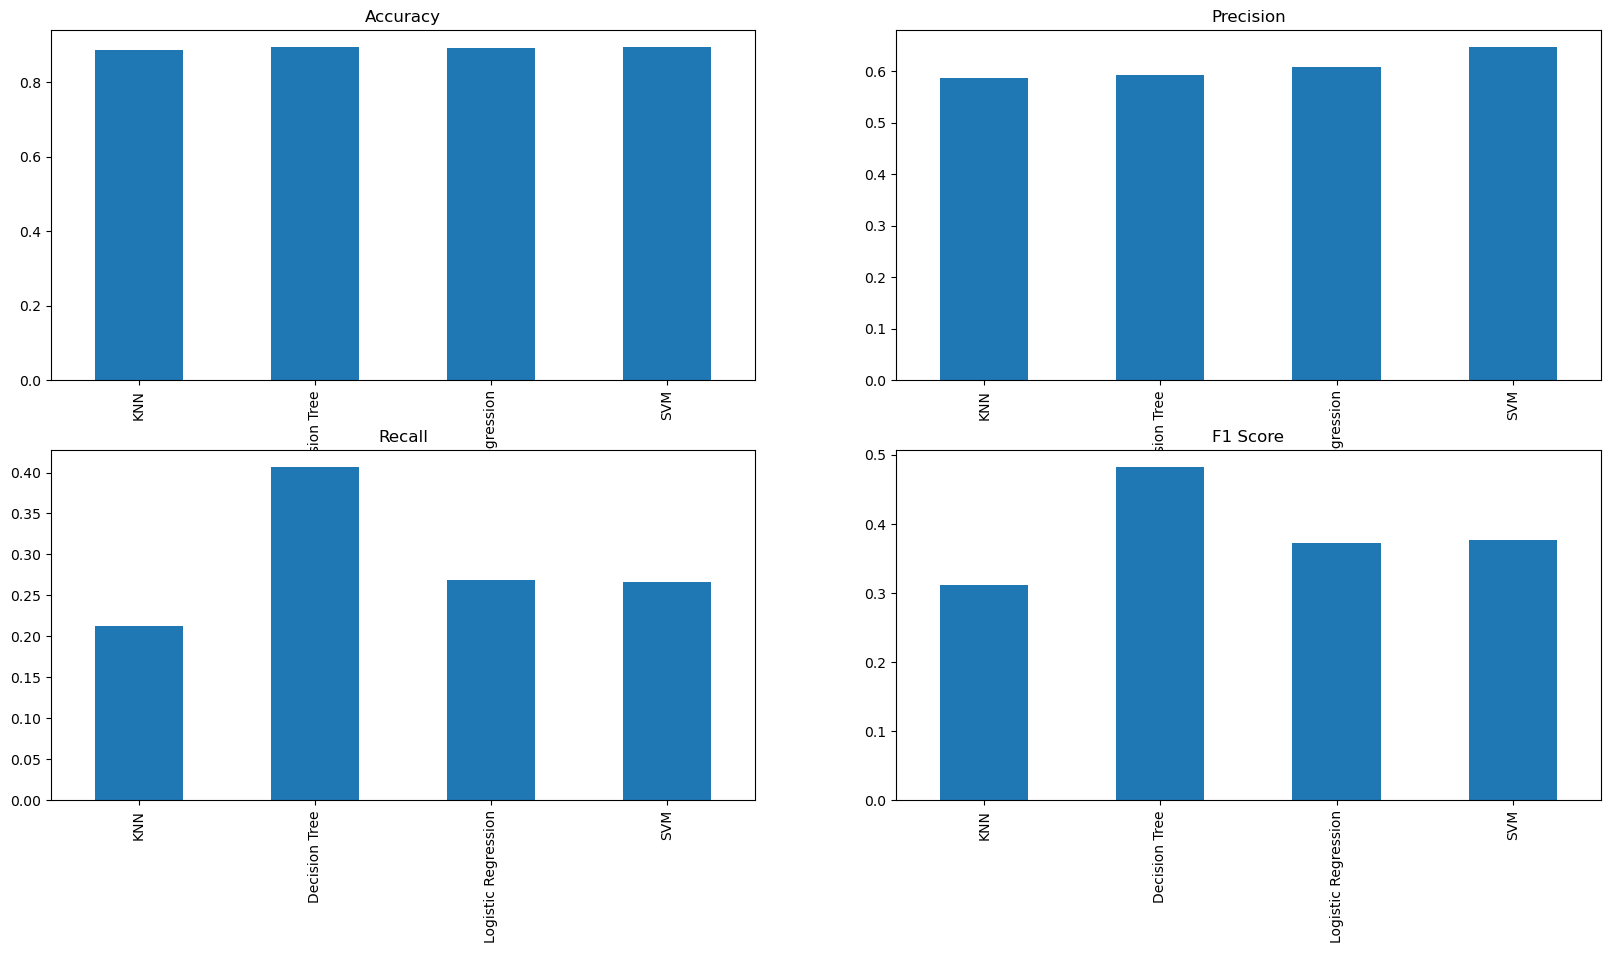

In [143]:
# plot main metrics
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
metrics_df['accuracy'].plot(kind='bar', ax=ax[0, 0])
metrics_df['precision_score'].plot(kind='bar', ax=ax[0, 1])
metrics_df['recall_score'].plot(kind='bar', ax=ax[1, 0])
metrics_df['f1_score'].plot(kind='bar', ax=ax[1, 1])
# set titles
ax[0, 0].set_title('Accuracy')
ax[0, 1].set_title('Precision')
ax[1, 0].set_title('Recall')
ax[1, 1].set_title('F1 Score')
# show plot
plt.show()

### Conclusion
Our target metric is to understand if the client subscribes to a term deposit or not. For this business problem, I choose "Accuracy" as the main performance metric there is no reason to penalize false positives or false negatives. At the same time if false positive predictions cause a big overspending of a marketing budget it requires to use of "Precision" in this case.

Comparing the Accuracy between models we can see that they perform very close. Decision Tree has the best Accuracy and it means it's the best model for our case. The Decision Tree has outstanding results with the "Recall" metric compared to other models.

The SVM model is the best if we need better Precision, however, it has significantly longer training time compared to other models.

### Next steps and recommendations
To improve our models we can interpret our models, find main features in our data set and try to remove less important columns to reduce data noise. It may improve results for some models except Decision Tree since that model is less impacted by the presence of extra features in a dataset. 